Miranda Carou Laíño

Raquel Alfonso Rodríguez

In [69]:
from qiskit import QuantumCircuit, transpile
from qiskit.quantum_info import Statevector
from qiskit_aer import AerSimulator
from qiskit.visualization import array_to_latex
from qiskit.visualization import plot_histogram
import matplotlib.pyplot as plt
import numpy as np
import time

In [104]:
def qc_autoenc(num_qubits):

    num_layers = 2
    qc = QuantumCircuit(num_qubits)

    for i in range(num_qubits):

        qc.rx(2*np.pi/(1*(i+1)),i)
        qc.ry(2*np.pi/(2*(i+1)),i)


    for l in range(num_layers):

        for i in range(n):
            for j in range(i+1, num_qubits):
                qc.cx(i,j)

        qc.barrier()

        for i in range(num_qubits):

            qc.rx(2*np.pi*(l+1)/(3*(i+1)),i)
            qc.ry(2*np.pi*(l+1)/(4*(i+1)),i)
            qc.rz(2*np.pi*(l+1)/(5*(i+1)),i)

    qc.barrier()

    for i in range(num_qubits):

        qc.ry(-2*np.pi/(2*(i+1)),i)
        qc.rx(-2*np.pi/(1*(i+1)),i)

    qc.save_statevector()

    qc.measure_all()

    qc.draw('mpl')
    
    return(qc)

In [144]:
range_qubits = 20

In [145]:
time_statevector_mean = []
time_statevector_median = []
time_statevector_std = []

for i in range(1, range_qubits+1):
    
    time_executions = []
    
    qc = qc_autoenc(i)
    
    for i in range(20):
        
        time_ini = time.time()

        simulator = AerSimulator()
        result = simulator.run(qc).result()
        statevector = Statevector(result.data(0)['statevector'])
        
        # display(statevector.draw('latex'))
        
        time_fin = time.time()
        
        time_executions.append(time_fin-time_ini)
        
    
    mean = np.mean(time_executions)
    median = np.median(time_executions)
    std = np.var(time_executions)
    
    time_statevector_mean.append(mean)
    time_statevector_median.append(median)
    time_statevector_std.append(std)

In [146]:
print(time_statevector_mean)
print(time_statevector_median)
print(time_statevector_std)

[np.float64(0.01209404468536377), np.float64(0.013622868061065673), np.float64(0.014905130863189698), np.float64(0.016491389274597167), np.float64(0.018190300464630126), np.float64(0.02023991346359253), np.float64(0.02240757942199707), np.float64(0.024958550930023193), np.float64(0.02746438980102539), np.float64(0.029657363891601562), np.float64(0.03381457328796387), np.float64(0.039177405834198), np.float64(0.047420167922973634), np.float64(0.064403235912323), np.float64(0.06162824630737305), np.float64(0.07265714406967164), np.float64(0.09510575532913208), np.float64(0.14464913606643676), np.float64(0.2426558256149292), np.float64(0.46089342832565305)]
[np.float64(0.011943578720092773), np.float64(0.013654828071594238), np.float64(0.014887332916259766), np.float64(0.016568779945373535), np.float64(0.01822972297668457), np.float64(0.020378828048706055), np.float64(0.022740602493286133), np.float64(0.025454998016357422), np.float64(0.0276944637298584), np.float64(0.029522061347961426),

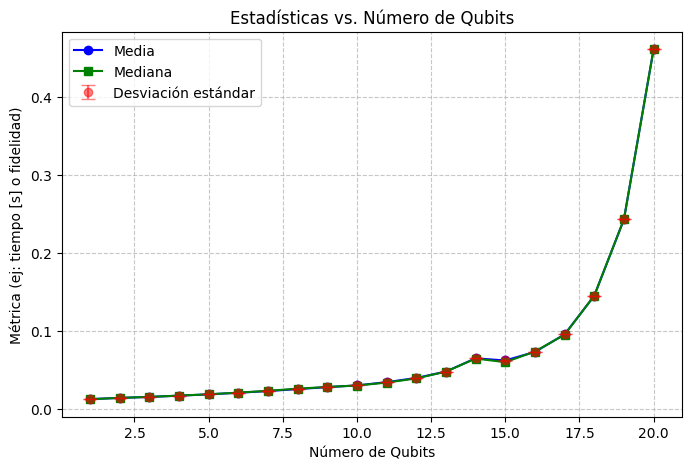

In [147]:
qubits = list(range(1,range_qubits+1))

plt.figure(figsize=(8, 5))
plt.plot(qubits, time_statevector_mean, 'o-', label='Media', color='blue')
plt.plot(qubits, time_statevector_median, 's-', label='Mediana', color='green')
plt.errorbar(qubits, time_statevector_mean, yerr=time_statevector_std, fmt='o', capsize=5, label='Desviación estándar', color='red', alpha=0.5)
 
# Añadir etiquetas y leyenda
plt.xlabel('Número de Qubits')
plt.ylabel('Métrica (ej: tiempo [s] o fidelidad)')
plt.title('Estadísticas vs. Número de Qubits')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [149]:
time_run_mean = []
time_run_median = []
time_run_std = []

for i in range(1, range_qubits+1):
    
    time_executions = []
    
    qc = qc_autoenc(i)
    
#     display(qc.draw('mpl'))
    
    for i in range(20):
        
        time_ini = time.time()

        simulator = AerSimulator()
        job_simulator = simulator.run(qc, shots = 2048)
        result_simulator = job_simulator.result()
        counts = result_simulator.get_counts()
        
        # display(statevector.draw('latex'))
        
        time_fin = time.time()
        
        time_executions.append(time_fin-time_ini)
        
    
#     print(len(time_executions))
#     print(time_executions)
    
    mean = np.mean(time_executions)
    median = np.median(time_executions)
    var = np.std(time_executions)
    
    time_run_mean.append(mean)
    time_run_median.append(median)
    time_run_std.append(std)

In [150]:
print(time_run_mean)
print(time_run_median)
print(time_run_std)

[np.float64(0.0216886043548584), np.float64(0.021243798732757568), np.float64(0.02445114850997925), np.float64(0.025387144088745116), np.float64(0.02672560214996338), np.float64(0.030110836029052734), np.float64(0.03139568567276001), np.float64(0.035905301570892334), np.float64(0.040056896209716794), np.float64(0.04721980094909668), np.float64(0.04948678016662598), np.float64(0.0536864161491394), np.float64(0.06297148466110229), np.float64(0.08135462999343872), np.float64(0.0771863341331482), np.float64(0.08840675354003906), np.float64(0.1117868185043335), np.float64(0.16072688102722169), np.float64(0.2619575023651123), np.float64(0.4774093985557556)]
[np.float64(0.022021889686584473), np.float64(0.021981477737426758), np.float64(0.02410566806793213), np.float64(0.02535271644592285), np.float64(0.02661263942718506), np.float64(0.030662059783935547), np.float64(0.031077861785888672), np.float64(0.03621399402618408), np.float64(0.039849042892456055), np.float64(0.0443347692489624), np.fl

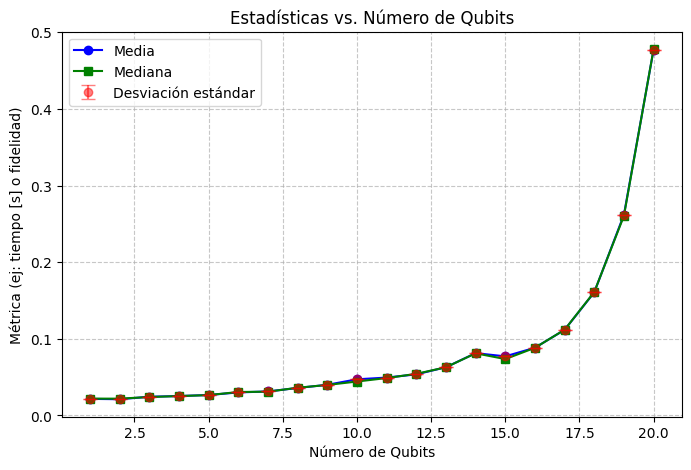

In [151]:
qubits = list(range(1,range_qubits+1))

plt.figure(figsize=(8, 5))
plt.plot(qubits, time_run_mean, 'o-', label='Media', color='blue')
plt.plot(qubits, time_run_median, 's-', label='Mediana', color='green')
plt.errorbar(qubits, time_run_mean, yerr=time_run_std, fmt='o', capsize=5, label='Desviación estándar', color='red', alpha=0.5)
 
# Añadir etiquetas y leyenda
plt.xlabel('Número de Qubits')
plt.ylabel('Métrica (ej: tiempo [s] o fidelidad)')
plt.title('Estadísticas vs. Número de Qubits')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()